In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# In this example we will code logistic regression from scratch

In [36]:
data = pd.read_csv("heart.csv")

## We will be using predicting the presence of heart disease 

In [37]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [38]:
# use multiple feature to predict whether or not they have heart disease
# we will be using the features RestingBP, Cholestrol, FastingBS, MaxHR and OldPeak

features = data.drop(columns = ['Age', 'Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'HeartDisease'])

In [39]:
features.head(5)
features = features.dropna()

In [40]:
actual_y = data['HeartDisease']

In [41]:
actual_y.head(5)

0    0
1    1
2    0
3    1
4    0
Name: HeartDisease, dtype: int64

# Let's define our sigmoid function, which will take any input and return a value between 0 and 1. It is defined as 1.0/(1 + exp(-z))

# Our z will be the linear regressed form the the different features. So each input will be multiplied by its corresponding weight

In [42]:
def sigmoid(z):
    return 1.0 /(1+ np.exp(-z))

def predict(features, weight):
    z = np.dot(features, weights)
    
    return sigmoid(z) # this will return z which is a dot product of the features and the weights

In [43]:
features.shape

(918, 5)

# We cant use the same cost function that we used in linear regression as now our prediction function is non-linear due to sigmoid function

# Squaring prediction as we do in MSE results in a non-convex function with many local minimums. If our cost function has many local minimums, gradient descent may not find the local minimum

# As such , we are going to use cross-entropy instead

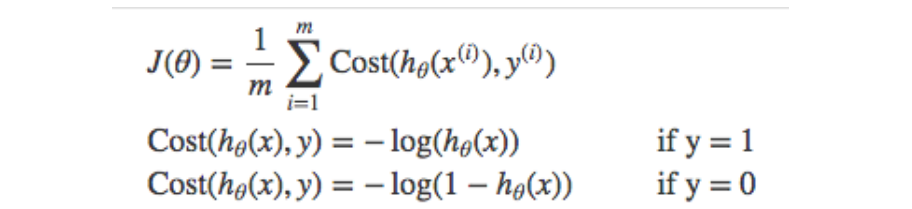

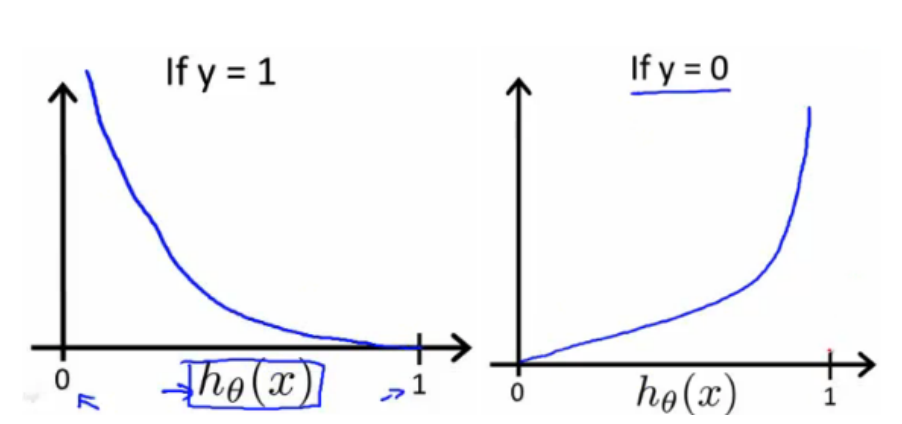

 the above diagram depicts the log loss against the predicted values 

# 

# now we can combine the above functions into one
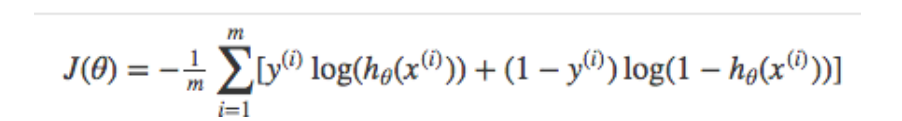
# so if y = 0,  the first side cancels out, if y = 1, the second side cancels out

# this is the vectorized cost function
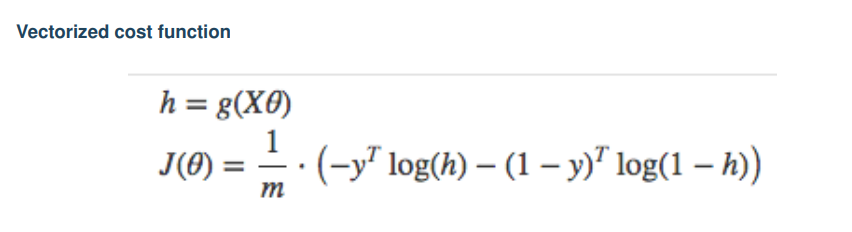

# So let us now write out our cross-entropy cost function

In [69]:
def cross_entropy(features, labels, weights):
    observations = len(labels) #gets the total number of heart disease values
    predictions = predict(features, weights)
    
    #clip predictions to avoid log(0) error
    predictions = np.clip(predictions, 1e-9, 1 - 1e-9)
    
    #take the error when label = 1
    class1_cost = -labels*np.log(predictions)
    
    #take the error when label = 0
    class2_cost = (1-labels)*np.log(1-predictions)
    
    #take the sum of both costs
    cost = class1_cost - class2_cost
    
    #take the average cost
    cost = cost.sum() / observations
    
    return cost

# To minimize our cost, we use Gradient Descent just like we did for linear regression

# 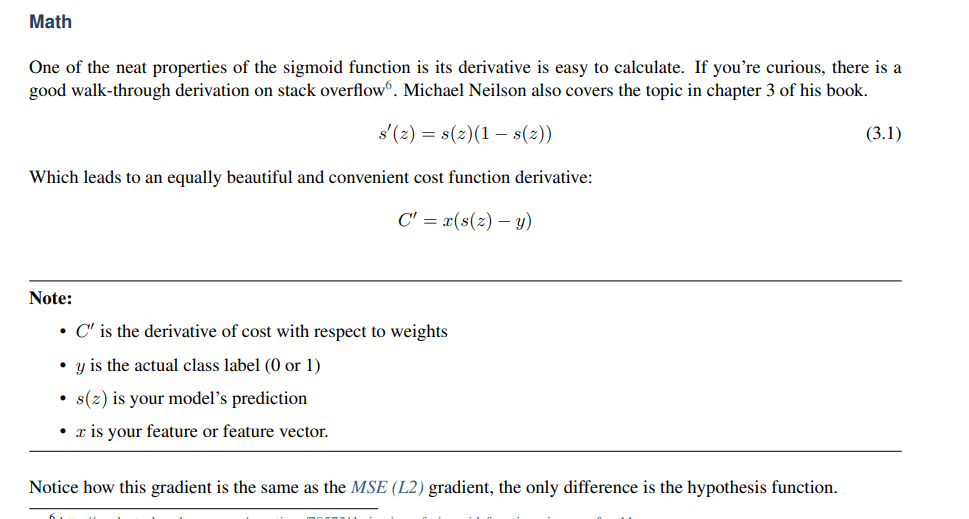

#  Pseudocode
# 1. Calculate gradient average
# 2. Multiply by learning rate
# 3. Subtract from weights

In [45]:
def update_weights(features, labels, weights, lr):
    N = len(features)
    
    #1- Get the predictions
    predictions = predict(features, weights)
    
    gradient = np.dot(features.T, predictions - labels)
    
    # get the average cost derivative for each feature
    gradient /= N
    
    # multiply the gradient by our learning rate
    gradient *= lr
    
    # subtract from our weights to minimize cost
    weights -= gradient
    
    return weights

# Mapping probabilities to classes 
## The final step is to assign class labels (0 or 1) to our predicted probabilities

# Decision boundary (boundary to separate and classify data points as 0 and 1)

In [46]:
def decision_boundary(prob):
    if(prob >= 0.5):
        return 1
    else:
        return 0
    
# convert probabilities to classes 

def classify(predictions):
    decision_boundary = np.vectorize(decision_boundary)
    return decision_boundary(predictions).flatten()
    

# Training


In [47]:
# now lets do our training of model

In [70]:
# it is the same as the one that we used in linear regression
def train(features, labels, weights, lr, iters):
    cost_history = []
    
    for i in range(iters):
        weights = update_weights(features, labels, weights, lr)
        
        #Calculate error for auditing purposes 
        cost = cross_entropy(features, labels, weights)
        cost_history.append(cost)
        
        # Log progress
        if i % 1000 == 0:
            print(f"iter: {i}, cost: {cost:.8f}")

    return weights, cost_history
    
    
            
                             

# Model evaluation

In [15]:
# if our model is working, we should see our cost decrease after each iteration

In [67]:
weights = np.zeros(5)

In [74]:
train(features, actual_y, weights, 0.00001, 5000)

iter: 0, cost: 4.75832686
iter: 1000, cost: 2.18459426
iter: 2000, cost: 1.98521343
iter: 3000, cost: 1.78470259
iter: 4000, cost: 1.58650962


(array([ 0.21871771, -0.0141165 ,  0.22173727, -0.18873229,  1.02128158]),
 [4.758326859662387,
  4.664728879761755,
  4.573202832553159,
  4.483941167893629,
  4.396772647703254,
  4.312020454163362,
  4.229131670914464,
  4.14750102997554,
  4.068249249203814,
  3.9913658568089203,
  3.9170739891964734,
  3.84521884257555,
  3.7760194728556975,
  3.709171950718518,
  3.6452966396423365,
  3.5842167421707014,
  3.5256721063632797,
  3.469814027867281,
  3.416418946612715,
  3.3653233363575326,
  3.3163597263684483,
  3.269699255167629,
  3.225322808259886,
  3.1832106864166776,
  3.1428546699443625,
  3.104255521953906,
  3.0676890582107954,
  3.032986416963531,
  2.999806124194427,
  2.9678903814786772,
  2.9373229978031747,
  2.9080682569374585,
  2.880268744617236,
  2.853890363617134,
  2.8288606259399964,
  2.805052217357419,
  2.782361121571671,
  2.7608264263843356,
  2.740323595007608,
  2.7206788173569647,
  2.701946930554679,
  2.6841637102062097,
  2.6672826305512536,
  2.6

# Our model works as the cost function decreases over the iterations